In [1]:
import transbigdata as tbd

# Set your mapboxtoken with the following code
tbd.set_mapboxtoken('pk.eyJ1IjoiY2hlbmdjaGFvY2hhbyIsImEiOiJjbGU1aDZ2eWUwMXp4M29udmFnNnNyZjBhIn0.2Kd0ZX06ReEdBnZ9XU4XUA')
# The token you applied for must be set in it.
tbd.set_imgsavepath(f'D:\Code\Python\PaChong\高德poi爬取源码(2022.4.17更新版)\data_output\\')

Set mapboxtoken success
Set imgsavepath success


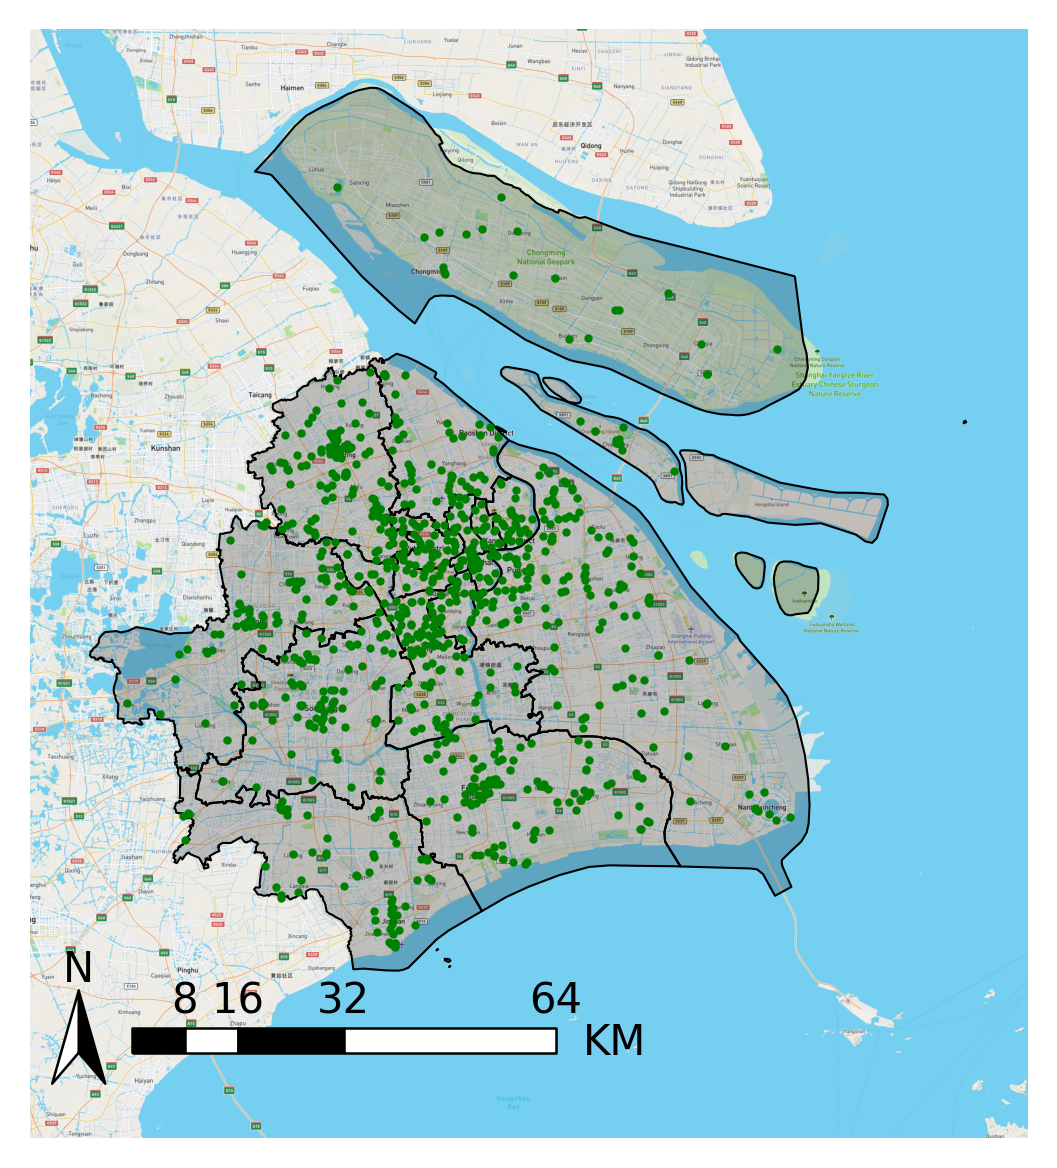

In [6]:
import pandas as pd
import transbigdata as tbd
import geopandas as gpd
import plot_map
import matplotlib.pyplot as plt


# data=pd.read_csv('data_output/公园广场_去重.csv')
data=pd.read_csv('data_output/上海公园广场(高德POI).csv')
# data=pd.read_csv('data_output/上海_公园广场.csv',encoding='gbk')
# data=pd.read_csv('商场.csv')
data.columns=['adname','adress','divisions','lng','lat']

sh=gpd.read_file(f'data_input/上海市.json')

# Define display range 
bounds=[data['lng'].min(),data['lat'].min()-0.15,data['lng'].max()+0.3,data['lat'].max()+0.1]
# Plot Frame
# fig =plt.figure(1,(8,8),dpi=250)
# ax =plt.subplot(111)
# plt.sca(ax)
# Add map basemap
# plot_map.plot_map(plt,bounds,zoom =12,style = 4)
# Add scale bar and north arrow

fig=plt.figure(1,dpi=300)
ax=plt.subplot(111)
plt.sca(ax)

plot_map.plot_map(plt,bounds,zoom ='auto',style = 2)
tbd.plotscale(ax,bounds = bounds,textsize = 10,compasssize = 1,accuracy = 8000,rect = [0.005,0.005],zorder = 10)
sh.plot(ax=ax,edgecolor=(0,0,0,1),facecolor=(0,0,0,0.2),linewidth=0.5)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
# 取消坐标轴显示
# plt.axis('off')
ax.scatter(data['lng'],data['lat'],s=1,color='green')

In [ ]:
fig=plt.figure(1,dpi=300)
ax=plt.subplot(111)
plt.sca(ax)

plot_map.plot_map(plt,bounds,zoom =12,style = 4)
sh.plot(ax=ax,edgecolor=(0,0,0,1),facecolor=(0,0,0,0.2),linewidth=0.5)
plt.xticks(fontsize=6)
plt.yticks(fontsize=6)
ax.scatter(data['lng'],data['lat'],s=1,color='gold')

In [3]:
import pandas as pd 
import transbigdata as tbd

data=pd.read_csv('data_output\公园.csv')
data['lng'],data['lat']=tbd.gcj02towgs84(data['lng'],data['lat'])
data.to_csv('data_output\徐汇区公园_wgs84.csv',index=False,encoding='utf-8-sig')